In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/tmp/ipykernel_620486/912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import torch
import torch.nn as nn
import torchvision
from unet import UNET

In [3]:
model = UNET(in_channels=3, out_channels=1)

In [4]:
ckpt = torch.load('model_best4.pth.tar')

In [5]:
model.load_state_dict(ckpt)

<All keys matched successfully>

In [6]:
from PIL import Image
from torchvision import transforms

In [19]:
img = Image.open('ACPRJNQA.png').convert('RGB')
tsfm = transforms.Compose([transforms.ToTensor()])
img_tensor = tsfm(img)
img_tensor = img_tensor.unsqueeze(0)
img_tensor.shape

torch.Size([1, 3, 2943, 2997])

In [20]:
x = model(img_tensor)

NameError: name 'TF' is not defined

In [ ]:
preds = (torch.sigmoid(x) > 0.5).float()
# torchvision.utils.save_image(preds, "some.png")

In [ ]:
transforms.ToPILImage()(preds.squeeze())

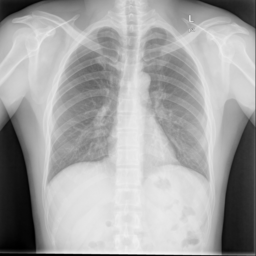

In [16]:
transforms.ToPILImage()(img_tensor.squeeze())